# Ambiente

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from unidecode import unidecode
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Corpus de documentos

Textos de reviews de produtos extraídos de
https://github.com/americanas-tech/b2w-reviews01/blob/main/b2wreviews01_stil2019.pdf

Selecionaos uma amostra de 10 mil reviews.



In [ ]:
#baixando o corpus
!curl https://www.inf.ufrgs.br/~viviane/DS/ReviewsAmericanas.csv > ReviewsAmericanas.csv
#carregando em um dataframe
df = pd.read_csv('ReviewsAmericanas.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1549k  100 1549k    0     0   624k      0  0:00:02  0:00:02 --:--:--  624k


# Explorando o corpus

In [ ]:
df.sample(n=10)

,text
1931,comprei dia 6... hoje e dia 11 e nem movimenta...
4096,"O produto não é de má qualidade, porém não é d..."
1133,"Chegou rápido, mas venho faltando mandril e ch..."
1189,"Empresa ruim, não entrega e não devolve o dinh..."
1658,Inacreditável que uma empresa que já foi sinôn...
7771,"Atendeu as expectativas, custo benefício adequ..."
5957,"Gostei bastante do produto, que tem um belo de..."
4823,Fiz a compra desse produto no dia 21/02/2018 e...
8849,Gostei do produto.Deu um belo efeito na minha ...
2544,"Vi os pratos na loja física e gostei muito, ma..."


Verificando as palavras mais frequentes no corpus

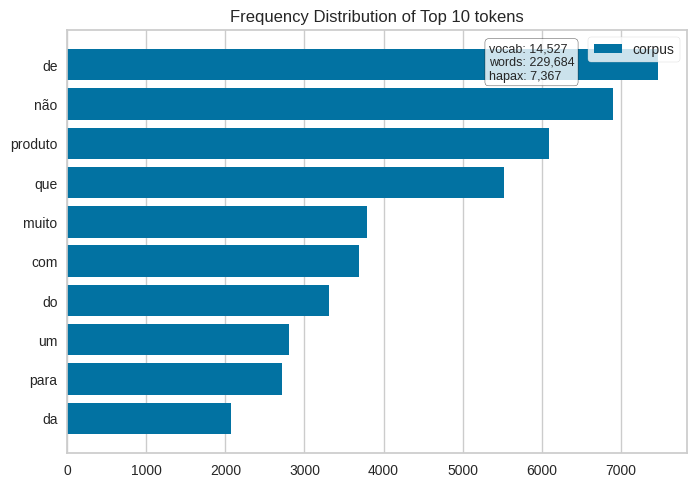

In [ ]:
# palavras mais frequentes no corpus
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

def frequencia_palavras(lista_texto, top_n=15, orient='v'):
    vectorizer = CountVectorizer()
    docs       = vectorizer.fit_transform(lista_texto)
    features   = vectorizer.get_feature_names_out()

    visualizer = FreqDistVisualizer(features=features, orient=orient, n=top_n)
    visualizer.fit(docs)
    visualizer.show()
frequencia_palavras(df['text'].values,10,'h')

Verificando a distribuição de tokens por documento

In [ ]:
#tokeniza o texto para verificar a distribuição de tokens por documento
#nr_tokens tem o número de tokens do documento
df['nr_tokens'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x,language='portuguese')))

Documentos: 10000
Menor número de tokens: 1
Maior número de tokens: 628
Número médio de tokens: 30.0
Documentos com mais de 100 tokens: 290
Documentos com menos de 2 tokens: 10


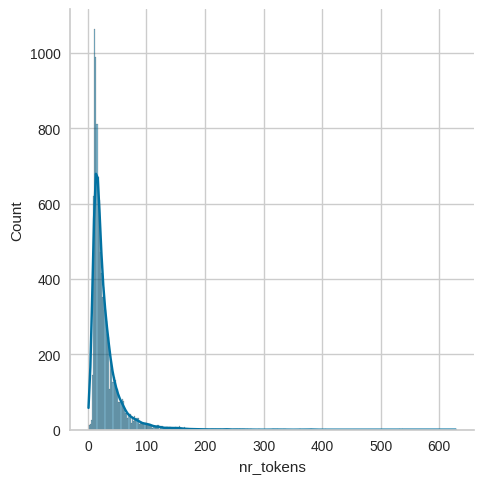

In [ ]:
print(f"Documentos: {len(df)}")
print(f"Menor número de tokens: {df['nr_tokens'].min()}")
print(f"Maior número de tokens: {df['nr_tokens'].max()}")
print(f"Número médio de tokens: {df['nr_tokens'].mean():.1f}")
print(f"Documentos com mais de 100 tokens: {len(df[df['nr_tokens']>100])}")
print(f"Documentos com menos de 2 tokens: {len(df[df['nr_tokens']<2])}")
sns.displot(data=df, x="nr_tokens", kde=True)

(0.0, 100.0)

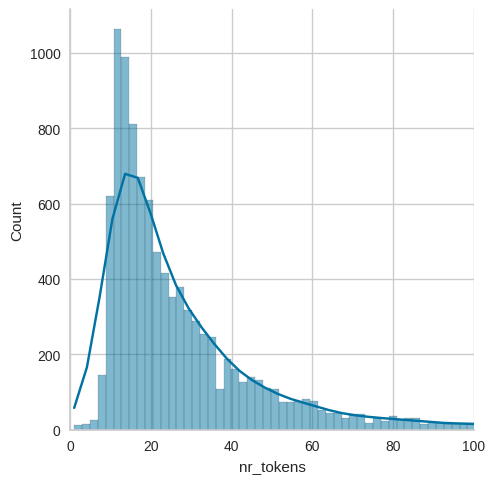

In [ ]:
# restringindo o gráfico  para mostrar a distribuição daqueles com até 100 tokens:
sns.displot(data=df, x="nr_tokens", kde=True)
plt.xlim(0, 100)

Distribuição do número de senteças nos documentos:

Documentos: 10000
Menor número de sentenças: 1
Maior número de sentenças: 38
Número médio de sentenças: 2.2
Documentos com apenas 1 sentença 44.2% 
Documentos com mais de 3 sentenças 13.8%


(0.0, 10.0)

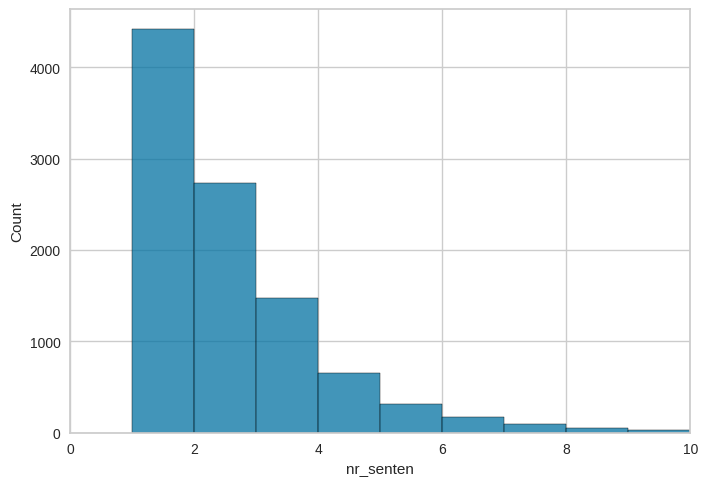

In [ ]:
df['nr_senten'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x, language='portuguese')))
print(f"Documentos: {len(df)}")
print(f"Menor número de sentenças: {df['nr_senten'].min()}")
print(f"Maior número de sentenças: {df['nr_senten'].max()}")
print(f"Número médio de sentenças: {df['nr_senten'].mean():.1f}")
print(f"Documentos com apenas 1 sentença {len(df[df['nr_senten']<2])/len(df)*100:.1f}% ")
print(f"Documentos com mais de 3 sentenças {len(df[df['nr_senten']>3])/len(df)*100:.1f}%" )
sns.histplot(data=df, x="nr_senten", binwidth=1)
plt.xlim(0, 10)

# Removendo StopWords

*Stopwords* são palavras muito usadas dentro do texto como artigos, pronomes, verbos auxiliares.

São palavras que não queremos usar para descrever o texto porque contribuem pouco ou  atrapalham na tarefa em questão.

In [ ]:
#baixando lista de stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
# stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("Num de stopwords da lista:", len(stop_words))
print(stop_words[0:10])
print(stop_words[50:60])
print(stop_words[0:206])

Num de stopwords da lista: 207
['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']
['estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos']
['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', '

In [ ]:
checar = ['não', 'sim', 'nunca']
for w in checar:
    print(w, w in stop_words)

não True
sim False
nunca False


In [ ]:
#a palavra "não" está na lista de stopwords, mas para análise de sentimentos ela é importante. Então vamos removâ-la da lista
stop_words.remove('não')
print(stop_words[110:130])

['mais', 'mas', 'me', 'mesmo', 'meu', 'meus', 'minha', 'minhas', 'muito', 'na', 'nas', 'nem', 'no', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'num']


Função de limpeza


In [ ]:
special_chars = "¨'!#$%&()*+,./:;<=>?@[\]^_`{|}~"
def preprocess(x):
    new_x = x.replace('"',' ')
    for c in special_chars:
        new_x = new_x.replace(c,' ')
    new_x = ' '.join([word for word in nltk.word_tokenize(new_x.lower(), language='portuguese') if word not in stop_words]) #removendo stop words
    new_x = re.sub(r'[^\w\s]', ' ', new_x) #removendo pontuação do texto
    new_x = re.sub("http\S+", ' ',new_x) # remove links
    new_x = re.sub("@\w+", ' ',new_x) # remove contas com @
    new_x = re.sub('#\S+', ' ',new_x) # hashtags
    new_x = re.sub('[0-9]+', ' ',new_x) # remove numeros e palavras com numeros
    new_x = unidecode(new_x) #acentos
    new_x = re.sub("\s+", ' ',new_x) # espaços
    new_x = new_x.strip()
    return new_x



In [ ]:
#vendo o antes e o depois
df['text_clean'] = df['text'].apply(preprocess)
df[['text','text_clean']].head(8)

,text,text_clean
0,MEU PRODUTO FOI FATURADO NO DIA 28.04 E COM EN...,produto faturado dia entrega dias uteis infeli...
1,Até q é bom ela frita bem.mas descasca por de...,q bom frita bem descasca dentro cesto pouco us...
2,Comprei essa boneca era para entregar em 5 dia...,comprei boneca entregar dias uteis faz uns dia...
3,Infelizmente não me atentei ao título do produ...,infelizmente nao atentei titulo produto catego...
4,"Celular péssimo, não reconhece wi-fi, volume b...",celular pessimo nao reconhece wi fi volume bai...
5,Varias funções desse controle não funcionam. U...,varias funcoes desse controle nao funcionam po...
6,Nunca mais compro na Americanas ! Não recebi n...,nunca compro americanas nao recebi nao consigo...
7,"UM DESCASO ESSE REPRESENTANTE DE VENDAS, NUM S...",descaso representante vendas site renome pedi ...


In [ ]:
df['nr_tokens2'] = df['text_clean'].apply(lambda x: len(nltk.word_tokenize(x, language='portuguese')))


Comparando antes e depois da limpeza

In [ ]:
print("--------------Texto original---------------")
print(f"Total de Tokens: {df['nr_tokens'].sum()}")
print(f"Documentos: {len(df)}")
print(f"Menor número de tokens por documento: {df['nr_tokens'].min()}")
print(f"Maior número de tokens por documento: {df['nr_tokens'].max()}")
print(f"Número médio de tokens por documento: {df['nr_tokens'].mean():.1f}")
print(f"Documentos com mais de 100 tokens: {len(df[df['nr_tokens']>100])}")
print(f"Documentos com menos de 2 tokens: {len(df[df['nr_tokens']<2])}")

print("\n--------------Depois da limpeza---------------")
print(f"Total de Tokens: {df['nr_tokens2'].sum()}")
print(f"Documentos: {len(df)}")
print(f"Menor número de tokens por documento: {df['nr_tokens2'].min()}")
print(f"Maior número de tokens por documento: {df['nr_tokens2'].max()}")
print(f"Número médio de tokens por documento: {df['nr_tokens2'].mean():.1f}")
print(f"Documentos com mais de 100 tokens: {len(df[df['nr_tokens2']>100])}")
print(f"Documentos com menos de 2 tokens: {len(df[df['nr_tokens2']<2])}")


--------------Texto original---------------
Total de Tokens: 300368
Documentos: 10000
Menor número de tokens por documento: 1
Maior número de tokens por documento: 628
Número médio de tokens por documento: 30.0
Documentos com mais de 100 tokens: 290
Documentos com menos de 2 tokens: 10

--------------Depois da limpeza---------------
Total de Tokens: 155170
Documentos: 10000
Menor número de tokens por documento: 0
Maior número de tokens por documento: 628
Número médio de tokens por documento: 15.5
Documentos com mais de 100 tokens: 34
Documentos com menos de 2 tokens: 15


## Exercício 1) As stopwords representam qual percentual desse texto?

In [ ]:
# sua resposta aqui

# Total de tokens antes da remoção de stopwords
total_tokens_original = df['nr_tokens'].sum()

# Total de tokens após a remoção de stopwords
total_tokens_limpo = df['nr_tokens2'].sum()

# Quantidade de stopwords removidas
total_stopwords = total_tokens_original - total_tokens_limpo

# Percentual de stopwords
percentual_stopwords = (total_stopwords / total_tokens_original) * 100

print(f"Stopwords removidas: {total_stopwords}")
print(f"Total de tokens originais: {total_tokens_original}")
print(f"Percentual de stopwords: {percentual_stopwords:.2f}%")



Stopwords removidas: 145198
Total de tokens originais: 300368
Percentual de stopwords: 48.34%


As stopwords representam aproximadamente 48,34% do total de tokens do corpus original.

Cálculo:

Total de tokens originais: 300.368

Tokens após remoção das stopwords: 155.170

Stopwords removidas: 145.198

Percentual:

(300368/145198)×100 ≈ 48,34%

As palavras mais frequentes têm mais significado sem as stopwords

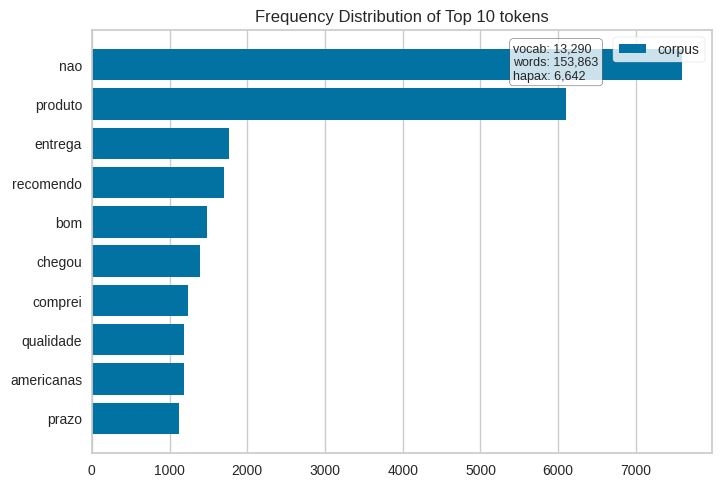

In [ ]:
frequencia_palavras(df['text_clean'].values,10,'h')

# Stemming

In [ ]:
# https://www.nltk.org/_modules/nltk/stem/rslp.html
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
# radicais de algumas palavras usando dois stemers:
stemmer1 = nltk.stem.RSLPStemmer()
stemmer2 = nltk.stem.SnowballStemmer('portuguese')

palavras = ['francesinhas', 'francês', 'franco','árvore', 'liquidificador', 'paisagem', 'pais', 'país', 'com', 'carinho', 'carrinho', 'caminho', 'bonitão', 'capitães', 'almoçaremos', 'almoçaste', 'almoçando', 'bebê', 'bebida']
for p in palavras:
    print(p, stemmer1.stem(p), stemmer2.stem(p))



francesinhas frances francesinh
francês franc francês
franco franc franc
árvore árvor árvor
liquidificador liquidific liquidific
paisagem pais paisag
pais pal pais
país país país
com com com
carinho car carinh
carrinho carr carrinh
caminho caminh caminh
bonitão bonit bonitã
capitães capitã capitã
almoçaremos almoç almoc
almoçaste almoç almoc
almoçando almoç almoc
bebê bebê beb
bebida beb beb


In [ ]:
#aplicando stemmer depois de remover stopwords:
stemmer2 = nltk.stem.SnowballStemmer('portuguese')
df['text_stems'] = df['text_clean'].apply(lambda x: ' '.join([stemmer1.stem(word) for word in nltk.word_tokenize(x)]))

In [ ]:
df[['text_clean','text_stems']][3:50]

,text_clean,text_stems
3,infelizmente nao atentei titulo produto catego...,infeliz nao atent titul produt categor fit dev...
4,celular pessimo nao reconhece wi fi volume bai...,celul pess nao reconhec wi fi volum baix dific...
5,varias funcoes desse controle nao funcionam po...,var funco dess control nao funcion porc fot an...
6,nunca compro americanas nao recebi nao consigo...,nunc compr americ nao receb nao consig fal ame...
7,descaso representante vendas site renome pedi ...,descas represent vend sit renom ped cade vei f...
8,nunca vi jogo pra pedir tanta atualizacao desi...,nunc vi jog pra ped tant atualizaca desinstal ...
9,nota ruim visto ainda nao recebi produto ningu...,not ruim vist aind nao receb produt ning da no...
10,recebi prazo conectei computador comecei fazer...,receb praz conect comput comec faz backup ind ...
11,bom dia repetidor wireless repiter n veio defe...,bom dia repet wireles repit n vei defeit tecn ...
12,perfume veio alcool puro nao cheiro silver sce...,perfum vei alcool pur nao cheir silv scent use...


In [ ]:
#função para contar tokens distintos
def conta_tokens (texto):
  tokens_nltk = []
  for t in texto.values:
    tokens_nltk.extend(nltk.word_tokenize(t))
  tokens_distintos = set(tokens_nltk)
  return len(tokens_distintos)

print ('Tokens distintos no texto original:', conta_tokens(df['text']))
print ('Tokens distintos no texto sem stop words:', conta_tokens(df['text_clean']))
print ('Stems distintos no texto:', conta_tokens(df['text_stems']))


Tokens distintos no texto original: 19766
Tokens distintos no texto sem stop words: 13315
Stems distintos no texto: 6977


In [ ]:
df['nr_tokens3'] = df['text_stems'].apply(lambda x: len(nltk.word_tokenize(x, language='portuguese')))

In [ ]:
print("--------------Texto original---------------")
print(f"Total de Tokens: {df['nr_tokens'].sum()}")
print(f"Documentos: {len(df)}")
print(f"Menor número de tokens por documento: {df['nr_tokens'].min()}")
print(f"Maior número de tokens por documento: {df['nr_tokens'].max()}")
print(f"Número médio de tokens por documento: {df['nr_tokens'].mean():.1f}")
print(f"Documentos com mais de 100 tokens: {len(df[df['nr_tokens']>100])}")
print(f"Documentos com menos de 2 tokens: {len(df[df['nr_tokens']<2])}")

print("\n--------------Depois da limpeza---------------")
print(f"Total de Tokens: {df['nr_tokens2'].sum()}")
print(f"Documentos: {len(df)}")
print(f"Menor número de tokens por documento: {df['nr_tokens2'].min()}")
print(f"Maior número de tokens por documento: {df['nr_tokens2'].max()}")
print(f"Número médio de tokens por documento: {df['nr_tokens2'].mean():.1f}")
print(f"Documentos com mais de 100 tokens: {len(df[df['nr_tokens2']>100])}")
print(f"Documentos com menos de 2 tokens: {len(df[df['nr_tokens2']<2])}")

print("\n--------------Depois do stemming---------------")
print(f"Total de Tokens: {df['nr_tokens3'].sum()}")
print(f"Documentos: {len(df)}")
print(f"Menor número de tokens por documento: {df['nr_tokens3'].min()}")
print(f"Maior número de tokens por documento: {df['nr_tokens3'].max()}")
print(f"Número médio de tokens por documento: {df['nr_tokens3'].mean():.1f}")
print(f"Documentos com mais de 100 tokens: {len(df[df['nr_tokens3']>100])}")
print(f"Documentos com menos de 2 tokens: {len(df[df['nr_tokens3']<2])}")

--------------Texto original---------------
Total de Tokens: 300368
Documentos: 10000
Menor número de tokens por documento: 1
Maior número de tokens por documento: 628
Número médio de tokens por documento: 30.0
Documentos com mais de 100 tokens: 290
Documentos com menos de 2 tokens: 10

--------------Depois da limpeza---------------
Total de Tokens: 155170
Documentos: 10000
Menor número de tokens por documento: 0
Maior número de tokens por documento: 628
Número médio de tokens por documento: 15.5
Documentos com mais de 100 tokens: 34
Documentos com menos de 2 tokens: 15

--------------Depois do stemming---------------
Total de Tokens: 155170
Documentos: 10000
Menor número de tokens por documento: 0
Maior número de tokens por documento: 628
Número médio de tokens por documento: 15.5
Documentos com mais de 100 tokens: 34
Documentos com menos de 2 tokens: 15


## Exercício 2) Por que o número de palavras não mudou com o stemming?

##O número de palavras (tokens) não muda com o stemming porque o stemming altera apenas a forma das palavras, reduzindo-as ao seu radical, mas não remove palavras do texto.


##O stemming transforma palavras como "carinho", "carrinho" e "caminho" em radicais como "carinh", "carrinh", "caminh", mas não elimina nenhum token.

##Portanto, o número total de tokens permanece o mesmo, apenas com formas diferentes.

##["carinho", "carrinho", "caminho"]
##["carinh", "carrinh", "caminh"]


# Removendo Duplicidades e Nulos

In [ ]:
df

,text,nr_tokens,nr_senten,text_clean,nr_tokens2,text_stems,nr_tokens3
0,MEU PRODUTO FOI FATURADO NO DIA 28.04 E COM EN...,22,1,produto faturado dia entrega dias uteis infeli...,10,produt fatur dia entreg dia utel infeliz aind ...,10
1,Até q é bom ela frita bem.mas descasca por de...,33,1,q bom frita bem descasca dentro cesto pouco us...,20,q bom frit bem descasc dentr cest pouc uso tod...,20
2,Comprei essa boneca era para entregar em 5 dia...,29,1,comprei boneca entregar dias uteis faz uns dia...,16,compr bonec entreg dia utel faz um dia utel na...,16
3,Infelizmente não me atentei ao título do produ...,71,2,infelizmente nao atentei titulo produto catego...,31,infeliz nao atent titul produt categor fit dev...,31
4,"Celular péssimo, não reconhece wi-fi, volume b...",59,3,celular pessimo nao reconhece wi fi volume bai...,36,celul pess nao reconhec wi fi volum baix dific...,36
...,...,...,...,...,...,...,...
9995,Produto muito bom e útil. Indiquei para uma am...,24,3,produto bom util indiquei amiga correu garanti...,9,produt bom util indiq amig corr garant satisfe...,9
9996,Completamente funcional e prático! Perfeito pa...,44,6,completamente funcional pratico perfeito dia d...,23,complet func pra perfeit dia dia poi economiz ...,23
9997,"O aparelho celular é muito bom, comprei para d...",41,2,aparelho celular bom comprei dar presente nata...,18,aparelh celul bom compr dar pres natal filh am...,18
9998,"O produto chegou 10 dias antes do prazo, excel...",14,1,produto chegou dias antes prazo excelente prec...,8,produt cheg dia ant praz excel prec qual,8


In [ ]:
# remove documentos com texto com comprimento zero ou nulo
df = df[df['text_clean']!='']
df = df[~df['text_clean'].isna()]
df.reset_index(drop=True, inplace=True)
len(df)

9996

In [ ]:
#remove duplicidades
dup = df[df.duplicated(subset=['text_clean'])]
print('duplicidade: ',len(dup))

duplicidade:  72


In [ ]:
df[df['text_clean']=='parabens agilidade entrega qualidade produto']

,text,nr_tokens,nr_senten,text_clean,nr_tokens2,text_stems,nr_tokens3
5242,Parabéns pela agilidade na entrega e qualidade...,10,1,parabens agilidade entrega qualidade produto,5,parab agil entreg qual produt,5
7640,Parabéns pela agilidade na entrega e qualidade...,10,1,parabens agilidade entrega qualidade produto,5,parab agil entreg qual produt,5
8572,Parabéns pela agilidade na entrega e qualidade...,10,1,parabens agilidade entrega qualidade produto,5,parab agil entreg qual produt,5
9091,Parabéns pela agilidade na entrega e qualidade...,10,1,parabens agilidade entrega qualidade produto,5,parab agil entreg qual produt,5
9893,Parabéns pela agilidade na entrega e qualidade...,10,1,parabens agilidade entrega qualidade produto,5,parab agil entreg qual produt,5


In [ ]:
print('antes: ',len(df))
df = df.drop(dup.index)
print('depois: ', len(df))
df.reset_index(drop=True, inplace=True)

antes:  9996
depois:  9924


In [ ]:
df[df['text_clean']=='parabens agilidade entrega qualidade produto']

,text,nr_tokens,nr_senten,text_clean,nr_tokens2,text_stems,nr_tokens3
5187,Parabéns pela agilidade na entrega e qualidade...,10,1,parabens agilidade entrega qualidade produto,5,parab agil entreg qual produt,5


In [ ]:
df['text_clean']

,text_clean
0,produto faturado dia entrega dias uteis infeli...
1,q bom frita bem descasca dentro cesto pouco us...
2,comprei boneca entregar dias uteis faz uns dia...
3,infelizmente nao atentei titulo produto catego...
4,celular pessimo nao reconhece wi fi volume bai...
...,...
9919,produto bom util indiquei amiga correu garanti...
9920,completamente funcional pratico perfeito dia d...
9921,aparelho celular bom comprei dar presente nata...
9922,produto chegou dias antes prazo excelente prec...


#Gerando Representação BoW com pesos TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:
# calcula os valores tfidf gerando os vetores dos documentos:
tfidf_vectorizer = TfidfVectorizer()

#aqui estamos usando o texto sem passar por stemming
vetores_docs  = tfidf_vectorizer.fit_transform(df['text_clean'].values)
features   = tfidf_vectorizer.get_feature_names_out()
print(features[1:100])
vetores_docs.shape, features.shape

['aaa' 'aaaaaak' 'aaprelho' 'aaptador' 'abacaxi' 'abafado' 'abaixa'
 'abaixando' 'abaixar' 'abaixo' 'abaixou' 'abajur' 'abalada' 'abalar'
 'abandonei' 'abandonou' 'abc' 'abdomem' 'abelhas' 'abencoe' 'aberta'
 'abertas' 'aberto' 'abertos' 'abertura' 'abhp' 'abi' 'abisurdo' 'abnt'
 'abolir' 'aborrecer' 'aborreceu' 'aborrecida' 'aborrecido'
 'aborrecimento' 'abr' 'abra' 'abraca' 'abracadabra' 'abracadeira'
 'abraco' 'abracos' 'abram' 'abrange' 'abre' 'abrem' 'abreu' 'abreviado'
 'abri' 'abria' 'abrigada' 'abril' 'abrimos' 'abrindo' 'abrir' 'abriram'
 'abrirmos' 'abriu' 'abro' 'abs' 'absolut' 'absolutamente' 'absorcao'
 'absorto' 'absorve' 'absorvendo' 'absorvicao' 'absurda' 'absurdamente'
 'absurdo' 'absurdoooo' 'absurdooooo' 'absurdos' 'abusivo' 'abuso'
 'abusurdo' 'acaba' 'acabada' 'acabadas' 'acabado' 'acabam' 'acabamente'
 'acabamento' 'acabamentos' 'acabamos' 'acabando' 'acabar' 'acabaram'
 'acabe' 'acabei' 'acabem' 'acabo' 'acabou' 'academia' 'academico'
 'academicos' 'acampamento' 

((9924, 13290), (13290,))

In [ ]:
# # opções de preprocessamento que sobrescrevem funcoes do tfidftokenizer:

# tfidf_vectorizer = TfidfVectorizer(input='filename', max_features=200,
#                            token_pattern='(?u)\\b[a-zA-Z]\\w{2,}\\b',
#                            max_df=0.05,
#                            stop_words='english',
#                            ngram_range=(1, 3))


# def meu_preprocessamento(doc):
#     # tokeniza com algum toeknizador
#     # adiciona funcoes de preprocessamento
#     return doc
#
# tfidf = TfidfVectorizer(
#     analyzer='word',
#     tokenizer=meu_tokenizador,
#     preprocessor=meu_tokenizador,
#     token_pattern=None)



## Analisando os vetores gerados

In [ ]:
#analisando os vetores do documento 0
doc_id = 0
vetores_docs[doc_id]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 13290)>

In [ ]:
#features e valores tfidf pertencentes ao 1o documento (indice 0)
print(vetores_docs[doc_id])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 13290)>
  Coords	Values
  (0, 10179)	0.12332070387544902
  (0, 5713)	0.5817676067661519
  (0, 4117)	0.27810344154660555
  (0, 4900)	0.1995789883199157
  (0, 4136)	0.2726408355760897
  (0, 12758)	0.4292278568799086
  (0, 6964)	0.3687084099585471
  (0, 479)	0.24958013637343182
  (0, 8569)	0.1286753359571252
  (0, 10662)	0.23622468638779717


In [ ]:
# podemos expandir os vetores comprimidos
# verificando o documento (d1)
print('Documento1: ',df.at[doc_id,'text_clean'])
d1 = vetores_docs[doc_id].toarray()[0]
print('tamanho do vetor d1:', len(d1))
print(d1)

Documento1:  produto faturado dia entrega dias uteis infelizmente ainda nao recebi
tamanho do vetor d1: 13290
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# no vetor expandido do documento d1 as features que realmente existem no vetor são:
ids = np.argwhere(d1>0)
ids = np.transpose(ids)[0]
print(ids)

[  479  4117  4136  4900  5713  6964  8569 10179 10662 12758]


In [ ]:
d1

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# score da palavra no documento
d1[4117], features[4117]

(np.float64(0.27810344154660555), 'dia')

In [ ]:
print('Documento d1: ',df.at[doc_id,'text_clean'])
print('>>> as palavras que existem em d1 são:')
print(features[ids])
print('>>> tfidf das palavras de d1 são: ')
print(d1[ids])

Documento d1:  produto faturado dia entrega dias uteis infelizmente ainda nao recebi
>>> as palavras que existem em d1 são:
['ainda' 'dia' 'dias' 'entrega' 'faturado' 'infelizmente' 'nao' 'produto'
 'recebi' 'uteis']
>>> tfidf das palavras de d1 são: 
[0.24958014 0.27810344 0.27264084 0.19957899 0.58176761 0.36870841
 0.12867534 0.1233207  0.23622469 0.42922786]


In [ ]:
# podemos expandir toda a matriz tfidf:
m = vetores_docs.toarray()
print(f'Matriz tfidf (linhas=docs, colunas=features): {m.shape}')
# visualizando a matriz esparsa tfidf: LINHAS = DOCUMENTOS, COLUNAS = FEATURES = TOKENS
dfM = pd.DataFrame(m)
dfM

Matriz tfidf (linhas=docs, colunas=features): (9924, 13290)


,0,1,2,3,4,5,6,7,8,9,...,13280,13281,13282,13283,13284,13285,13286,13287,13288,13289
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# imprimindo as palavas e seus índices
for w in dict(enumerate(features)):
   print(w, dict(enumerate(features))[w])


A saída de streaming foi truncada nas últimas 5000 linhas.
8290 mobiliar
8291 mobly
8292 moca
8293 mochila
8294 modalidade
8295 mode
8296 modela
8297 modelador
8298 modeladora
8299 modelagem
8300 modelar
8301 modelo
8302 modelos
8303 modem
8304 moderada
8305 moderadamente
8306 moderado
8307 moderna
8308 modernas
8309 modernidade
8310 moderno
8311 modernos
8312 modestas
8313 modesto
8314 modificada
8315 modificado
8316 modificou
8317 modinha
8318 modo
8319 modos
8320 modulador
8321 modulo
8322 modulos
8323 moe
8324 moecao
8325 moeda
8326 moedor
8327 moendo
8328 moeu
8329 mofado
8330 mofo
8331 moi
8332 moist
8333 mola
8334 molas
8335 moldam
8336 molde
8337 moldura
8338 mole
8339 moleka
8340 molenga
8341 moleque
8342 moletons
8343 moleza
8344 molha
8345 molhada
8346 molhadinha
8347 molhado
8348 molhar
8349 molho
8350 molhou
8351 momento
8352 momentos
8353 momoria
8354 monaco
8355 mondado
8356 mondial
8357 monitor
8358 monitoramento
8359 monitorar
8360 monitores
8361 mono
8362 monopolio
83

In [ ]:
# obtendo o token a partir do id (nr da coluna)
id_palavra = 4622 #palavra "embalagem"
featuresId=dict(enumerate(features))
featuresId[id_palavra]

'embalagem'

In [ ]:
# Em quantos documentos (document frequency) esse token está presente e qual o valor do score
print(f"O token <{features[id_palavra]}> aparece em {len(dfM[dfM[id_palavra]>0][id_palavra])} documento(s):")
dfM[dfM[id_palavra]>0][id_palavra]


O token <embalagem> aparece em 102 documento(s):


,4622
52,0.206026
73,0.244312
97,0.198177
228,0.199463
246,0.168559
...,...
8756,0.164300
8823,0.356720
8928,0.202887
9309,0.114823


In [ ]:
#imprimindo os documentos que têm a palavra selecionada
print(df.at[52,'text_clean'])
print(df.at[8756,'text_clean'])

produto si bom fiquei decepcionada embalagem veio rachada produto vazando perdi parte produto nao cuidado entrega frasco fino ponto rasgar vazar
produto otimo vale pena comprar nunca problemas entrega americanas porem produto deu trabalho pra chegar aqui demorou costuma demorar chegou dentro prazo embalagem produto veio completamente estragada umida acho q tomou banho chuva porem aparelho perfeitas condicoes


In [ ]:
#Diferença entre frequência global (collection frequency) e document frequency (df)
#A frequência global é o número de ocorrências da palavra. Já o document frequency é o número de documentos/instâncias em que ela aparece
tokens_nltk = []
for t in df['text_clean'].values:
   tokens_nltk.extend(nltk.word_tokenize(t, language='portuguese'))


palavra = "pessimo"
id_palavra = tfidf_vectorizer.vocabulary_.get(palavra)

print(f"A frequência do token <{features[id_palavra]}> na coleção é {tokens_nltk.count(features[id_palavra])}.")
print(f"O token <{features[id_palavra]}> aparece em {len(dfM[dfM[id_palavra]>0][id_palavra])} documentos.")



A frequência do token <pessimo> na coleção é 304.
O token <pessimo> aparece em 237 documentos.


## Estatísticas sobre o IDF

In [ ]:
vetores_docs.shape, tfidf_vectorizer.idf_.shape

((9924, 13290), (13290,))

In [ ]:
idf_scores = tfidf_vectorizer.idf_

In [ ]:
dfidf = pd.DataFrame({'idf':idf_scores,'words':tfidf_vectorizer.get_feature_names_out()})

<Axes: >

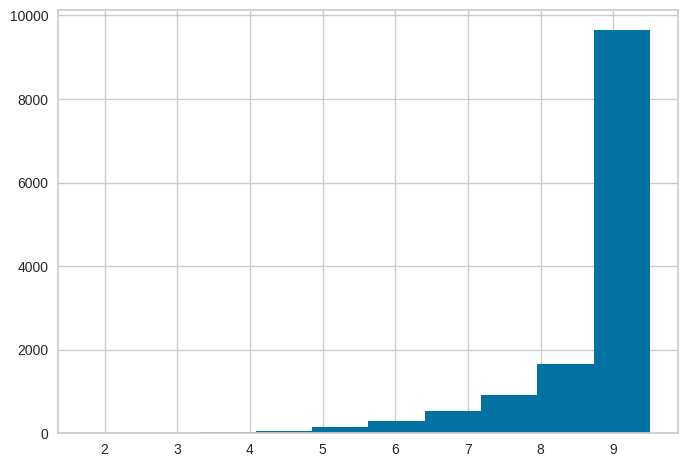

In [ ]:
dfidf['idf'].hist()

In [ ]:
dfidf.sort_values(by=['idf'],ascending=False, inplace=True)


In [ ]:
# importância das palavras no corpus
dfidf

,idf,words
13289,9.509665,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz...
13288,9.509665,zumbis
13287,9.509665,zumbido
2,9.509665,aaaaaak
3,9.509665,aaprelho
...,...,...
1746,3.028854,bom
4900,2.832581,entrega
10735,2.787637,recomendo
8569,1.826261,nao


In [ ]:
# valores de idf e quantidade de palavras
dfidf.groupby(['idf']).count().sort_values(by=['idf'],ascending=False).head(20)

,words
idf,
9.509665,6921
9.104200,1881
8.816518,851
8.593374,587
8.411053,374
8.256902,262
8.123371,247
8.005588,179
7.900227,160


# Calculando o cosseno entre documentos

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#import numpy as np

#escolhendo 3 documentos abitrariamente
id1 = 0
id2 = 2
id3 = 4

#imprimindo o texto dos documentos
print('Documento 1: ',df.at[id1,'text_clean'])
print('Documento 2: ',df.at[id2,'text_clean'])
print('Documento 3: ',df.at[id3,'text_clean'])

#pegando os vetores dos documentos
d1 = vetores_docs[id1]
d2 = vetores_docs[id2]
d3 = vetores_docs[id3]

#calculando o cosseno para todos os pares de documentos
print('\nCosseno d1 e d2: ',cosine_similarity(d1, d2))
print('Cosseno d1 e d3: ',cosine_similarity(d1, d3))
print('Cosseno d2 e d3: ',cosine_similarity(d2, d3))

#o cosseno de 2 documentos idênticos é 1
print('\nCosseno d1 e d1: ',cosine_similarity(d1, d1))

#o cosseno de 2 documentos que não têm palavras em comum é 0
print('\nCosseno d0 e d8000: ',cosine_similarity(vetores_docs[0], vetores_docs[8000]))
print('Documento 0: ',df.at[0,'text_clean'])
print('Documento 8000: ',df.at[8000,'text_clean'])

Documento 1:  produto faturado dia entrega dias uteis infelizmente ainda nao recebi
Documento 2:  comprei boneca entregar dias uteis faz uns dias uteis nada nao dao satisfacao nao ai clientes
Documento 3:  celular pessimo nao reconhece wi fi volume baixo dificuldades ouvir tudo ligacoes videos audio nao reconhece nenhum aplicativo gps ja perdi varias vezes aplicativos baixados nao funcionam nesse celular terrivel quanto americanas sempre boa entrega prazo

Cosseno d1 e d2:  [[0.33600815]]
Cosseno d1 e d3:  [[0.03342771]]
Cosseno d2 e d3:  [[0.02265655]]

Cosseno d1 e d1:  [[1.]]

Cosseno d0 e d8000:  [[0.]]
Documento 0:  produto faturado dia entrega dias uteis infelizmente ainda nao recebi
Documento 8000:  momento funcionando bem consegue dar cargas completos celulares


## Exercício 3) Qual o cosseno entre documentos que não têm palavras em comum? Crie um exemplo para ilustrar a sua resposta

In [ ]:
#sua resposta aqui

##O cosseno entre dois documentos que não têm palavras em comum é igual a 0.

##Isso ocorre porque os vetores TF-IDF gerados para os documentos não terão
##nenhuma posição com valor diferente de zero em comum. Assim, o produto escalar entre os vetores será zero, o que implica em cosseno = 0.

##EX:

print('\nCosseno d0 e d8000: ',cosine_similarity(vetores_docs[0], vetores_docs[8000]))
print('Documento 0: ',df.at[0,'text_clean'])
print('Documento 8000: ',df.at[8000,'text_clean'])



Cosseno d0 e d8000:  [[0.]]
Documento 0:  produto faturado dia entrega dias uteis infelizmente ainda nao recebi
Documento 8000:  momento funcionando bem consegue dar cargas completos celulares
